<a href="https://colab.research.google.com/github/LandonAmickUNCC/ECGR4105/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Landon* Amick 801293791 Homework 4 https://github.com/LandonAmickUNCC/ECGR4105

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
import seaborn as sns; sns.set()
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
import time

Part 1

In [52]:
from sklearn.preprocessing import StandardScaler

t_u = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_c = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# Normalize the data using StandardScaler
scaler = StandardScaler()

# Convert tensors to numpy arrays, reshape, and scale
scaled_t_u_np = scaler.fit_transform(t_u.numpy().reshape(-1, 1))
scaled_t_c_np = scaler.fit_transform(t_c.numpy().reshape(-1, 1))


# Convert scaled numpy arrays back to tensors
scaled_t_u = torch.tensor(scaled_t_u_np.flatten())
scaled_t_c = torch.tensor(scaled_t_c_np.flatten())


print("Scaled t_u:", scaled_t_u)
print("Scaled t_c:", scaled_t_c)

Scaled t_u: tensor([-1.1386,  0.3985,  0.5124,  1.9925,  0.0569, -0.2846, -0.8539, -1.6510,
        -0.5124,  0.2846,  1.1955])
Scaled t_c: tensor([-1.0032,  0.2555,  0.3988,  1.8756,  0.2804, -0.1807, -1.1154, -1.8693,
        -0.2119,  0.5359,  1.0344])


In [53]:
#Setting up linear model
def model1(t_u, w1, b):
  return w1 * t_u + b
def model2(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())
t_p = model2(scaled_t_u, w1, w2, b)
print(t_p)

loss = loss_fn(t_p, t_c)
print(loss)

tensor([ 0.1578,  0.5573,  0.7749,  5.9628,  0.0602, -0.2036, -0.1247,  1.0747,
        -0.2498,  0.3657,  2.6248])
tensor(2804.4333)


In [54]:
def train_nonlinear_model1(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        loss_history = []
        t_p = model1(scaled_t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())

        if epoch % 500 == 0:
          print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params, loss_history

In [55]:
def train_nonlinear_model2(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        loss_history = []
        t_p = model2(scaled_t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())

        if epoch % 500 == 0:
          print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params, loss_history


lr=.1

In [56]:
params2 = torch.tensor([1.0,1.0,0.0], requires_grad=True)
params1 = torch.tensor([1.0,0.0], requires_grad=True)
learning_rate = 1e-1
optimizer2 = torch.optim.Adam([params2], lr=learning_rate)
optimizer1 = torch.optim.Adam([params1], lr=learning_rate)

trained_params2, loss_history2 = train_nonlinear_model2(5000, optimizer2, params2, scaled_t_u, scaled_t_c)
print('------')
trained_params1, loss_history1 = train_nonlinear_model1(5000, optimizer1, params1, scaled_t_u, scaled_t_c)

Epoch 500, Loss 0.029783
Epoch 1000, Loss 0.029783
Epoch 1500, Loss 0.029783
Epoch 2000, Loss 0.029783
Epoch 2500, Loss 0.029783
Epoch 3000, Loss 0.029783
Epoch 3500, Loss 0.029783
Epoch 4000, Loss 0.029783
Epoch 4500, Loss 0.029783
Epoch 5000, Loss 0.029783
------
Epoch 500, Loss 0.037954
Epoch 1000, Loss 0.037954
Epoch 1500, Loss 0.037954
Epoch 2000, Loss 0.037954
Epoch 2500, Loss 0.037954
Epoch 3000, Loss 0.037976
Epoch 3500, Loss 0.037954
Epoch 4000, Loss 0.037954
Epoch 4500, Loss 0.037954
Epoch 5000, Loss 0.037960


lr=.01

In [57]:
params2 = torch.tensor([1.0,1.0,0.0], requires_grad=True)
params1 = torch.tensor([1.0,0.0], requires_grad=True)
learning_rate = 1e-2
optimizer2 = torch.optim.Adam([params2], lr=learning_rate)
optimizer1 = torch.optim.Adam([params1], lr=learning_rate)

train_nonlinear_model2(5000, optimizer2, params2, scaled_t_u, scaled_t_c)
print('------')
train_nonlinear_model1(5000, optimizer1, params1, scaled_t_u, scaled_t_c)

Epoch 500, Loss 0.029784
Epoch 1000, Loss 0.029783
Epoch 1500, Loss 0.029783
Epoch 2000, Loss 0.029783
Epoch 2500, Loss 0.029783
Epoch 3000, Loss 0.029783
Epoch 3500, Loss 0.029783
Epoch 4000, Loss 0.029783
Epoch 4500, Loss 0.029783
Epoch 5000, Loss 0.029783
------
Epoch 500, Loss 0.037954
Epoch 1000, Loss 0.037954
Epoch 1500, Loss 0.037954
Epoch 2000, Loss 0.037954
Epoch 2500, Loss 0.037954
Epoch 3000, Loss 0.037955
Epoch 3500, Loss 0.037954
Epoch 4000, Loss 0.037954
Epoch 4500, Loss 0.037954
Epoch 5000, Loss 0.037955


(tensor([ 9.8145e-01, -1.7500e-05], requires_grad=True), [0.03795544058084488])

lr=.001

In [58]:
params2 = torch.tensor([1.0,1.0,0.0], requires_grad=True)
params1 = torch.tensor([1.0,0.0], requires_grad=True)
learning_rate = 1e-3
optimizer2 = torch.optim.Adam([params2], lr=learning_rate)
optimizer1 = torch.optim.Adam([params1], lr=learning_rate)

train_nonlinear_model2(5000, optimizer2, params2, scaled_t_u, scaled_t_c)
print('------')
train_nonlinear_model1(5000, optimizer1, params1, scaled_t_u, scaled_t_c)

Epoch 500, Loss 0.705866
Epoch 1000, Loss 0.267567
Epoch 1500, Loss 0.118391
Epoch 2000, Loss 0.054186
Epoch 2500, Loss 0.034211
Epoch 3000, Loss 0.030252
Epoch 3500, Loss 0.029808
Epoch 4000, Loss 0.029783
Epoch 4500, Loss 0.029783
Epoch 5000, Loss 0.029783
------
Epoch 500, Loss 0.037954
Epoch 1000, Loss 0.037954
Epoch 1500, Loss 0.037954
Epoch 2000, Loss 0.037954
Epoch 2500, Loss 0.037954
Epoch 3000, Loss 0.037954
Epoch 3500, Loss 0.037954
Epoch 4000, Loss 0.037954
Epoch 4500, Loss 0.037954
Epoch 5000, Loss 0.037954


(tensor([ 9.8084e-01, -8.9993e-07], requires_grad=True), [0.03795415535569191])

lr=.0001

In [59]:
params2 = torch.tensor([1.0,1.0,0.0], requires_grad=True)
params1 = torch.tensor([1.0,0.0], requires_grad=True)
learning_rate = 1e-4
optimizer2 = torch.optim.Adam([params2], lr=learning_rate)
optimizer1 = torch.optim.Adam([params1], lr=learning_rate)

train_nonlinear_model2(5000, optimizer2, params2, scaled_t_u, scaled_t_c)
print('------')
train_nonlinear_model1(5000, optimizer1, params1, scaled_t_u, scaled_t_c)

Epoch 500, Loss 2.409709
Epoch 1000, Loss 2.088259
Epoch 1500, Loss 1.807351
Epoch 2000, Loss 1.562090
Epoch 2500, Loss 1.348257
Epoch 3000, Loss 1.162136
Epoch 3500, Loss 1.000458
Epoch 4000, Loss 0.860479
Epoch 4500, Loss 0.740056
Epoch 5000, Loss 0.637446
------
Epoch 500, Loss 0.037954
Epoch 1000, Loss 0.037954
Epoch 1500, Loss 0.037954
Epoch 2000, Loss 0.037954
Epoch 2500, Loss 0.037954
Epoch 3000, Loss 0.037954
Epoch 3500, Loss 0.037954
Epoch 4000, Loss 0.037954
Epoch 4500, Loss 0.037954
Epoch 5000, Loss 0.037954


(tensor([ 9.8084e-01, -3.8409e-07], requires_grad=True), [0.03795415535569191])

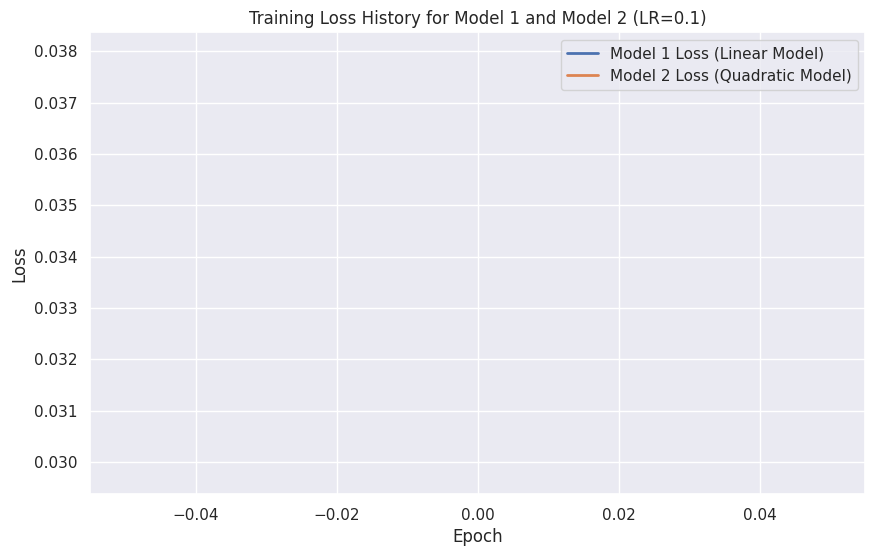

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(loss_history1, label='Model 1 Loss (Linear Model)' , linewidth=2)
plt.plot(loss_history2, label='Model 2 Loss (Quadratic Model)', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss History for Model 1 and Model 2 (LR=0.1)')
plt.legend()
plt.grid(True)
plt.show()

Part 2

In [61]:
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'

df = pd.read_csv(url)

# Convert 'yes'/'no' columns to 1/0
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in yes_no_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)

# Select features (X) and target (y)
X_housing = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y_housing = df['price']

# Normalize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaled_X_housing = scaler_X.fit_transform(X_housing)
scaled_X_housing = pd.DataFrame(scaled_X_housing, columns=X_housing.columns)

# Normalize the target (y_housing) using StandardScaler
scaler_y = StandardScaler()
scaled_y_housing = scaler_y.fit_transform(y_housing.values.reshape(-1, 1)).flatten()

print("Original Data Head:")
print(df.head())
print("\nScaled Features Head:")
print(scaled_X_housing.head())
print("\nScaled Target Head:")
print(scaled_y_housing[:5])

Original Data Head:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished  

Scaled Feat

In [62]:
# Define features (X) and target (y) for the housing dataset
# Now using the scaled features and scaled target
X_housing_processed = scaled_X_housing
y_housing_processed = pd.Series(scaled_y_housing) # Convert numpy array back to Series for consistency with split

# Split the housing data into training and testing sets
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing_processed, y_housing_processed, test_size=0.2, random_state=42) # Using a fixed random_state for reproducibility

print("Shape of X_train_housing:", X_train_housing.shape)
print("Shape of X_test_housing:", X_test_housing.shape)
print("Shape of y_train_housing:", y_train_housing.shape)
print("Shape of y_test_housing:", y_test_housing.shape)

Shape of X_train_housing: (436, 5)
Shape of X_test_housing: (109, 5)
Shape of y_train_housing: (436,)
Shape of y_test_housing: (109,)


In [63]:
# Convert training and testing sets to PyTorch tensors

X_train_housing_tensor = torch.tensor(X_train_housing.values, dtype=torch.float32)
X_test_housing_tensor = torch.tensor(X_test_housing.values, dtype=torch.float32)
y_train_housing_tensor = torch.tensor(y_train_housing.values, dtype=torch.float32)
y_test_housing_tensor = torch.tensor(y_test_housing.values, dtype=torch.float32)

print("Shape of X_train_housing_tensor:", X_train_housing_tensor.shape)
print("Shape of X_test_housing_tensor:", X_test_housing_tensor.shape)
print("Shape of y_train_housing_tensor:", y_train_housing_tensor.shape)
print("Shape of y_test_housing_tensor:", y_test_housing_tensor.shape)
print("Type of tensors:", X_train_housing_tensor.dtype)

Shape of X_train_housing_tensor: torch.Size([436, 5])
Shape of X_test_housing_tensor: torch.Size([109, 5])
Shape of y_train_housing_tensor: torch.Size([436])
Shape of y_test_housing_tensor: torch.Size([109])
Type of tensors: torch.float32


In [64]:
def housing_model(X, weights, bias):
    return torch.matmul(X, weights) + bias

In [65]:
# Training function for the housing model
def train_housing_model(n_epochs, optimizer, weights, bias, X_train, y_train):
    for epoch in range(1, n_epochs + 1):
        optimizer.zero_grad()

        # Predict prices using the housing model
        y_pred = housing_model(X_train, weights, bias)

        # Calculate loss (Mean Squared Error)
        loss = loss_fn(y_pred, y_train)

        # Backpropagate and update weights/bias
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return weights, bias

lr = .1

In [66]:
# Get the number of features from X_train_housing_tensor
num_features = X_train_housing_tensor.shape[1]

# Initialize weights and bias
# Weights should have a shape (num_features,)
weights = torch.randn(num_features, requires_grad=True, dtype=torch.float32)
bias = torch.zeros(1, requires_grad=True, dtype=torch.float32)

# Set learning rate and optimizer
learning_rate = 1e-1
optimizer = torch.optim.Adam([weights, bias], lr=learning_rate)

print("Initial Weights:", weights)
print("Initial Bias:", bias)

Initial Weights: tensor([-0.6624, -0.7216, -0.1487,  0.9684, -0.4632], requires_grad=True)
Initial Bias: tensor([0.], requires_grad=True)


In [67]:
n_epochs_housing = 5000
trained_weights, trained_bias = train_housing_model(
    n_epochs=n_epochs_housing,
    optimizer=optimizer,
    weights=weights,
    bias=bias,
    X_train=X_train_housing_tensor,
    y_train=y_train_housing_tensor
)

print("\nFinal Trained Weights:", trained_weights)
print("Final Trained Bias:", trained_bias)

Epoch 500, Loss 0.386586
Epoch 1000, Loss 0.386586
Epoch 1500, Loss 0.386586
Epoch 2000, Loss 0.386586
Epoch 2500, Loss 0.386587
Epoch 3000, Loss 0.386586
Epoch 3500, Loss 0.386586
Epoch 4000, Loss 0.386586
Epoch 4500, Loss 0.386588
Epoch 5000, Loss 0.386586

Final Trained Weights: tensor([0.3584, 0.0597, 0.3185, 0.2296, 0.1555], requires_grad=True)
Final Trained Bias: tensor([-0.0119], requires_grad=True)


In [68]:
with torch.no_grad(): # Disable gradient calculation for evaluation
    # Predict on the test set
    y_test_pred = housing_model(X_test_housing_tensor, trained_weights, trained_bias)

    # Calculate the loss on the test set
    test_loss = loss_fn(y_test_pred, y_test_housing_tensor)

print("Test Loss (Mean Squared Error):", float(test_loss))

Test Loss (Mean Squared Error): 0.6565407514572144


lr=.01

In [69]:
num_features = X_train_housing_tensor.shape[1]

# Initialize weights and bias
# Weights should have a shape (num_features,)
weights = torch.randn(num_features, requires_grad=True, dtype=torch.float32)
bias = torch.zeros(1, requires_grad=True, dtype=torch.float32)

# Set learning rate and optimizer
learning_rate = 1e-2
optimizer = torch.optim.Adam([weights, bias], lr=learning_rate)

print("Initial Weights:", weights)
print("Initial Bias:", bias)

Initial Weights: tensor([-1.7819,  0.0871, -0.6592, -0.0725,  0.0381], requires_grad=True)
Initial Bias: tensor([0.], requires_grad=True)


In [70]:
n_epochs_housing = 5000
trained_weights, trained_bias = train_housing_model(
    n_epochs=n_epochs_housing,
    optimizer=optimizer,
    weights=weights,
    bias=bias,
    X_train=X_train_housing_tensor,
    y_train=y_train_housing_tensor
)

print("\nFinal Trained Weights:", trained_weights)
print("Final Trained Bias:", trained_bias)

Epoch 500, Loss 0.388221
Epoch 1000, Loss 0.386586
Epoch 1500, Loss 0.386586
Epoch 2000, Loss 0.386586
Epoch 2500, Loss 0.386586
Epoch 3000, Loss 0.386586
Epoch 3500, Loss 0.386586
Epoch 4000, Loss 0.386586
Epoch 4500, Loss 0.386586
Epoch 5000, Loss 0.386586

Final Trained Weights: tensor([0.3584, 0.0597, 0.3185, 0.2296, 0.1555], requires_grad=True)
Final Trained Bias: tensor([-0.0119], requires_grad=True)


In [71]:
with torch.no_grad(): # Disable gradient calculation for evaluation
    # Predict on the test set
    y_test_pred = housing_model(X_test_housing_tensor, trained_weights, trained_bias)

    # Calculate the loss on the test set
    test_loss = loss_fn(y_test_pred, y_test_housing_tensor)

print("Test Loss (Mean Squared Error):", float(test_loss))

Test Loss (Mean Squared Error): 0.65654057264328


lr=.001

In [72]:
num_features = X_train_housing_tensor.shape[1]

# Initialize weights and bias
# Weights should have a shape (num_features,)
weights = torch.randn(num_features, requires_grad=True, dtype=torch.float32)
bias = torch.zeros(1, requires_grad=True, dtype=torch.float32)

# Set learning rate and optimizer
learning_rate = 1e-3
optimizer = torch.optim.Adam([weights, bias], lr=learning_rate)

print("Initial Weights:", weights)
print("Initial Bias:", bias)

Initial Weights: tensor([-0.1919,  0.9438, -0.3859, -0.3393,  0.4572], requires_grad=True)
Initial Bias: tensor([0.], requires_grad=True)


In [73]:
n_epochs_housing = 5000
trained_weights, trained_bias = train_housing_model(
    n_epochs=n_epochs_housing,
    optimizer=optimizer,
    weights=weights,
    bias=bias,
    X_train=X_train_housing_tensor,
    y_train=y_train_housing_tensor
)

print("\nFinal Trained Weights:", trained_weights)
print("Final Trained Bias:", trained_bias)

Epoch 500, Loss 0.594058
Epoch 1000, Loss 0.405878
Epoch 1500, Loss 0.387338
Epoch 2000, Loss 0.386595
Epoch 2500, Loss 0.386586
Epoch 3000, Loss 0.386586
Epoch 3500, Loss 0.386586
Epoch 4000, Loss 0.386586
Epoch 4500, Loss 0.386586
Epoch 5000, Loss 0.386586

Final Trained Weights: tensor([0.3584, 0.0597, 0.3185, 0.2296, 0.1555], requires_grad=True)
Final Trained Bias: tensor([-0.0119], requires_grad=True)


In [74]:
with torch.no_grad(): # Disable gradient calculation for evaluation
    # Predict on the test set
    y_test_pred = housing_model(X_test_housing_tensor, trained_weights, trained_bias)

    # Calculate the loss on the test set
    test_loss = loss_fn(y_test_pred, y_test_housing_tensor)

print("Test Loss (Mean Squared Error):", float(test_loss))

Test Loss (Mean Squared Error): 0.6565403938293457


lr=.0001

In [75]:
num_features = X_train_housing_tensor.shape[1]

# Initialize weights and bias
# Weights should have a shape (num_features,)
weights = torch.randn(num_features, requires_grad=True, dtype=torch.float32)
bias = torch.zeros(1, requires_grad=True, dtype=torch.float32)

# Set learning rate and optimizer
learning_rate = 1e-4
optimizer = torch.optim.Adam([weights, bias], lr=learning_rate)

print("Initial Weights:", weights)
print("Initial Bias:", bias)

Initial Weights: tensor([-0.5953, -0.6348, -1.6916,  0.5941,  0.3159], requires_grad=True)
Initial Bias: tensor([0.], requires_grad=True)


In [76]:
n_epochs_housing = 5000
trained_weights, trained_bias = train_housing_model(
    n_epochs=n_epochs_housing,
    optimizer=optimizer,
    weights=weights,
    bias=bias,
    X_train=X_train_housing_tensor,
    y_train=y_train_housing_tensor
)

print("\nFinal Trained Weights:", trained_weights)
print("Final Trained Bias:", trained_bias)

Epoch 500, Loss 6.101167
Epoch 1000, Loss 5.577709
Epoch 1500, Loss 5.110250
Epoch 2000, Loss 4.691547
Epoch 2500, Loss 4.316220
Epoch 3000, Loss 3.979525
Epoch 3500, Loss 3.676836
Epoch 4000, Loss 3.403312
Epoch 4500, Loss 3.153732
Epoch 5000, Loss 2.922734

Final Trained Weights: tensor([-0.1469, -0.1947, -1.2245,  0.8503,  0.6239], requires_grad=True)
Final Trained Bias: tensor([-0.0545], requires_grad=True)


In [77]:
with torch.no_grad(): # Disable gradient calculation for evaluation
    # Predict on the test set
    y_test_pred = housing_model(X_test_housing_tensor, trained_weights, trained_bias)

    # Calculate the loss on the test set
    test_loss = loss_fn(y_test_pred, y_test_housing_tensor)

print("Test Loss (Mean Squared Error):", float(test_loss))

Test Loss (Mean Squared Error): 4.042759418487549


Part 3

In [78]:
seq_model = nn.Sequential(nn.Linear(5,8),nn.ReLU(),nn.Linear(8,1))
seq_model

Sequential(
  (0): Linear(in_features=5, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [79]:
[param.shape for param in seq_model.parameters()]

[torch.Size([8, 5]), torch.Size([8]), torch.Size([1, 8]), torch.Size([1])]

In [80]:
for name, param in seq_model.named_parameters():
  print(name, param.shape)

0.weight torch.Size([8, 5])
0.bias torch.Size([8])
2.weight torch.Size([1, 8])
2.bias torch.Size([1])


In [92]:
def train_housing_model(n_epochs, optimizer, model_nn, X_train, y_train, X_test, y_test):
    start_time = time.time()
    final_train_loss = 0.0
    for epoch in range(1, n_epochs + 1):
        optimizer.zero_grad()

        # Predict prices using the housing model
        y_pred_train = model_nn(X_train)

        # Calculate training loss (Mean Squared Error)
        loss_train = loss_fn(y_pred_train, y_train)
        final_train_loss = loss_train.item()

        # Backpropagate and update weights/bias
        loss_train.backward()
        optimizer.step()

        if epoch % 200 == 0:
            print('Epoch %d, Training Loss %f' % (epoch, float(loss_train)))

    end_time = time.time()
    total_training_time = end_time - start_time
    print(f'Total training time: {total_training_time:.2f} seconds')

    with torch.no_grad():
        y_pred_test = model_nn(X_test)
        final_validation_loss = loss_fn(y_pred_test, y_test).item()
    print(f'Final Validatoin Loss: {final_validation_loss:.4f}')
    return model_nn, total_training_time, final_train_loss, final_validation_loss

In [93]:
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([
    ('hidden_layer', nn.Linear(5,8)),
    ('hidden_activation', nn.ReLU()),
    ('output_Linear',nn.Linear(8,1))
]))

seq_model

Sequential(
  (hidden_layer): Linear(in_features=5, out_features=8, bias=True)
  (hidden_activation): ReLU()
  (output_Linear): Linear(in_features=8, out_features=1, bias=True)
)

In [96]:
optimizer = torch.optim.SGD(seq_model.parameters(), lr=1e-1)
train_housing_model(200, optimizer, seq_model, X_train_housing_tensor, y_train_housing_tensor.unsqueeze(1), X_test_housing_tensor, y_test_housing_tensor.unsqueeze(1))
print('output', seq_model(X_test_housing_tensor).squeeze(1))
print('answer', y_test_housing_tensor)


Epoch 200, Training Loss 0.315034
Total training time: 0.15 seconds
Final Validatoin Loss: 0.6283
output tensor([ 8.7057e-01,  9.7558e-01, -7.5384e-01, -1.7560e-01, -5.8202e-01,
         6.4852e-02,  4.1325e-01,  2.1588e-01, -9.0384e-01, -9.7477e-01,
         2.8626e+00, -7.8041e-01, -8.3575e-01, -6.2229e-01, -4.3841e-01,
         5.1525e-01, -8.8186e-01,  3.3222e-01,  2.8832e-01, -4.4421e-01,
         5.2483e-01,  6.4170e-02, -8.5411e-01, -4.6364e-01,  3.4959e-01,
         1.4529e+00, -9.9868e-01, -3.5880e-01,  7.9139e-01, -6.1346e-01,
        -4.4423e-02, -7.0188e-01,  8.3540e-01,  1.9304e-01, -3.6259e-01,
         5.1217e-01,  2.7306e-03, -9.2455e-01, -7.4490e-01, -4.8127e-01,
         3.6935e-01, -8.5903e-01,  9.5316e-01, -3.0634e-01, -4.3167e-01,
        -2.6732e-01,  1.1885e+00, -5.7132e-02, -3.9533e-01, -9.1714e-01,
         1.8429e+00, -9.7943e-01, -2.6636e-01, -3.1846e-01, -7.8748e-01,
        -9.1288e-01,  1.2605e+00, -7.7024e-01,  3.0057e-01, -8.1506e-01,
        -3.7500e-01

3.B

In [84]:
seq_model = nn.Sequential(nn.Linear(5,8),nn.ReLU(),nn.Linear(8,8),nn.ReLU(),nn.Linear(8,8),nn.ReLU(), nn.Linear(8,8),nn.ReLU(),nn.Linear(8,1))
seq_model

Sequential(
  (0): Linear(in_features=5, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=8, bias=True)
  (5): ReLU()
  (6): Linear(in_features=8, out_features=8, bias=True)
  (7): ReLU()
  (8): Linear(in_features=8, out_features=1, bias=True)
)

In [85]:
[param.shape for param in seq_model.parameters()]

[torch.Size([8, 5]),
 torch.Size([8]),
 torch.Size([8, 8]),
 torch.Size([8]),
 torch.Size([8, 8]),
 torch.Size([8]),
 torch.Size([8, 8]),
 torch.Size([8]),
 torch.Size([1, 8]),
 torch.Size([1])]

In [86]:
for name, param in seq_model.named_parameters():
  print(name, param.shape)

0.weight torch.Size([8, 5])
0.bias torch.Size([8])
2.weight torch.Size([8, 8])
2.bias torch.Size([8])
4.weight torch.Size([8, 8])
4.bias torch.Size([8])
6.weight torch.Size([8, 8])
6.bias torch.Size([8])
8.weight torch.Size([1, 8])
8.bias torch.Size([1])


In [87]:
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([
    ('hidden_layer_1', nn.Linear(5,8)),
    ('hidden_activation_1', nn.ReLU()),
    ('hidden_layer_2', nn.Linear(8,8)),
    ('hidden_activation_2', nn.ReLU()),
    ('hidden_layer_3', nn.Linear(8,8)),
    ('hidden_activation_3', nn.ReLU()),
    ('output_Linear',nn.Linear(8,1))
]))

seq_model

Sequential(
  (hidden_layer_1): Linear(in_features=5, out_features=8, bias=True)
  (hidden_activation_1): ReLU()
  (hidden_layer_2): Linear(in_features=8, out_features=8, bias=True)
  (hidden_activation_2): ReLU()
  (hidden_layer_3): Linear(in_features=8, out_features=8, bias=True)
  (hidden_activation_3): ReLU()
  (output_Linear): Linear(in_features=8, out_features=1, bias=True)
)

In [97]:
optimizer = torch.optim.SGD(seq_model.parameters(), lr=1e-1)
seq_model, training_time, final_train_loss, final_validation_loss = train_housing_model(
    200,
    optimizer,
    seq_model,
    X_train_housing_tensor,
    y_train_housing_tensor.unsqueeze(1),
    X_test_housing_tensor,
    y_test_housing_tensor.unsqueeze(1)
)
y_test_pred_nn = seq_model(X_test_housing_tensor).squeeze(1)
print('output', y_test_pred_nn)
print('answer', y_test_housing_tensor)
print('y_test_pred_nn is now available.')

Epoch 200, Training Loss 0.311491
Total training time: 0.13 seconds
Final Validatoin Loss: 0.6254
output tensor([ 0.8737,  0.9864, -0.7631, -0.2122, -0.6002,  0.0565,  0.3993,  0.2075,
        -0.8820, -0.9855,  2.8560, -0.7864, -0.8426, -0.6224, -0.4649,  0.5225,
        -0.8837,  0.3836,  0.3389, -0.4460,  0.5329,  0.0551, -0.8612, -0.4375,
         0.2687,  1.4643, -1.0079, -0.2957,  0.7957, -0.6213, -0.0356, -0.6777,
         0.8453,  0.1336, -0.3852,  0.5306,  0.0177, -0.9524, -0.7493, -0.5032,
         0.3492, -0.8662,  0.9638, -0.2707, -0.4702, -0.2472,  1.1747, -0.0459,
        -0.3851, -0.9172,  1.9532, -0.9605, -0.2803, -0.3476, -0.8222, -0.9219,
         1.2505, -0.7491,  0.2733, -0.8216, -0.3778, -0.4622, -0.2350, -0.6310,
         0.2883, -0.3517,  1.5776, -0.6405,  1.4019,  0.1177, -0.3246,  0.4809,
        -0.2218,  1.0272, -1.0639, -0.0280, -0.4059, -0.6518,  0.2163, -0.1984,
         1.4285, -0.2183,  0.7141,  0.5280, -0.9090,  1.6467, -0.9552, -0.5697,
         1.7705

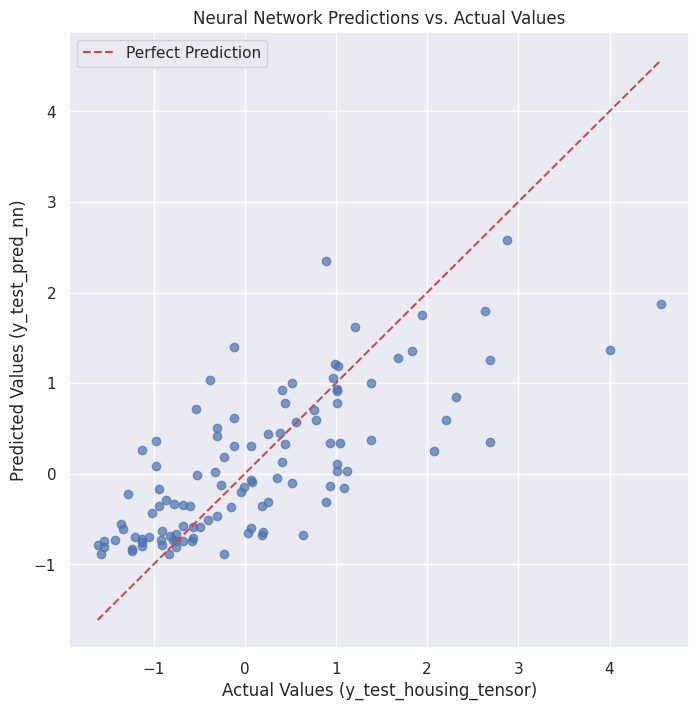

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test_housing_tensor.numpy(), y_test_pred_nn.detach().numpy(), alpha=0.7)
plt.plot([min(y_test_housing_tensor), max(y_test_housing_tensor)],
         [min(y_test_housing_tensor), max(y_test_housing_tensor)],
         '--r', label='Perfect Prediction')
plt.xlabel('Actual Values (y_test_housing_tensor)')
plt.ylabel('Predicted Values (y_test_pred_nn)')
plt.title('Neural Network Predictions vs. Actual Values')
plt.legend()
plt.grid(True)
plt.show()
